# UMC 301: Applied Data Science and Artificial Intelligence
## Assignment 1a

### Submission instructions:


1.   The assignment is to be submitted in ONE single notebook.
2.   Submit the .ipynb file and pdf of the same with all cells open through this Teams Assignment.
3. If your IISc email ID is < username > @iisc.ac.in, then name the file < username >_Assgn_1a. E.g. jonathan_Assgn_1a for email ID jonathan@iisc.ac.in.
4. Before submission, execute the ’Restart session and run all’ option from the Runtime/Kernel tab. Verify that there are no errors and that you are getting the output you expect.
5. Use the dataset **'SeoulBikeData.csv'**: https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1
6. Use significance level $\alpha = 0.05$ for all questions.
7. Calculate the hypothesis test statistics (stat_value, p_value, dof etc.) using equations and validate using the inbuit python functions.

# Question 1
Test if the mean of hourly bike rentals reduces if "Snowfall" is non zero in winter season. Use entire winter data from 'SeoulBikeData.csv'. Choose appropriate hypothesis test.

In [ ]:
# Data is loaded

import pandas as pd
import numpy as np
import requests
from scipy import stats
import math
import scipy.stats as stats
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt

# Url of the data

url = 'https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1'

# The csv file is directly read from the url

df = pd.read_csv(url)

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$

In [ ]:
# Every row where season is not winter is dropped now

df_1 = df[df['Seasons'] == 'Winter']
df_1 = df_1[df_1['Functioning Day'] == 'Yes']

In [ ]:
# n_1 is the number of observations in the dataset with snowfall = 0
# mu_1 is the mean of the 'Rented Bike Count' column for the observations with snowfall = 0
# sigma_1 is the standard deviation of the 'Rented Bike Count' column for the observations with snowfall = 0
# n_2 is the number of observations in the dataset with snowfall \neq 0
# mu_2 is the mean of the 'Rented Bike Count' column for the observations with snowfall \neq 0
# sigma_2 is the standard deviation of the 'Rented Bike Count' column for the observations with snowfall \neq 0

n_1 = df_1[df_1['Snowfall (cm)'] == 0.0].shape[0]
mu_1 = df_1[df_1['Snowfall (cm)'] == 0.0]['Rented Bike Count'].mean()
sigma_1 = df_1[df_1['Snowfall (cm)'] == 0.0]['Rented Bike Count'].std()


n_2 = df_1[df_1['Snowfall (cm)'] != 0.0].shape[0]
mu_2 = df_1[df_1['Snowfall (cm)'] != 0.0]['Rented Bike Count'].mean()
sigma_2 = df_1[df_1['Snowfall (cm)'] != 0.0]['Rented Bike Count'].std()

# Print the results

print('n_1 =', n_1)
print('mu_1 =', mu_1)
print('sigma_1 =', sigma_1)
print('n_2 =', n_2)
print('mu_2 =', mu_2)
print('sigma_2 =', sigma_2)

n_1 = 1768
mu_1 = 240.670814479638
sigma_1 = 154.0299995292062
n_2 = 392
mu_2 = 157.30357142857142
sigma_2 = 109.24517669770852


In [ ]:
# Significance level

alpha = 0.05

# Set precision for decimal calculations
getcontext().prec = 10

## Manual z-test and t-test

In [ ]:
def z_test(mu_1, sigma_1, n_1, mu_2, sigma_2, n_2, alpha=0.05):
    sample_mean_diff = mu_2 - mu_1
    standard_error = math.sqrt((sigma_1**2 / n_1) + (sigma_2**2 / n_2))
    z_statistic = sample_mean_diff / standard_error

    # p-value using the complementary error function
    p_value = math.erfc(abs(z_statistic) / math.sqrt(2))


    print(f"Null hypothesis {'rejected' if p_value < alpha else 'failed to be rejected'} at α = {alpha}")

    return z_statistic, p_value, p_value < alpha

In [ ]:
def t_test(mu_1, sigma_1, n_1, mu_2, sigma_2, n_2, alpha):
    sample_mean_diff = mu_2 - mu_1
    var_1 = sigma_1**2
    var_2 = sigma_2**2
    pooled_se = np.sqrt(var_1/n_1 + var_2/n_2)

    t_statistic = sample_mean_diff / pooled_se

    df = (var_1/n_1 + var_2/n_2)**2 / ((var_1/n_1)**2/(n_1-1) + (var_2/n_2)**2/(n_2-1))
    p_value = stats.t.sf(np.abs(t_statistic), df) * 2

    print(f"Null hypothesis {'rejected' if p_value < alpha else 'failed to be rejected'} at α = {alpha}")

    return t_statistic, p_value, p_value < alpha

In [ ]:
# z-test is performed

z_test(mu_1, sigma_1, n_1, mu_2, sigma_2, n_2, alpha)

Null hypothesis rejected at α = 0.05


(-12.587491780039079, 2.4741057258548217e-36, True)

In [ ]:
# t-test is performed

t_test(mu_1, sigma_1, n_1, mu_2, sigma_2, n_2, alpha)

Null hypothesis rejected at α = 0.05


(-12.587491780039079, 3.335926423244896e-33, True)

## Inbuilt z-test and t-test

In [ ]:
def one_sample_z_test(sample_mean, population_mean, population_std, sample_size, alpha=0.05):
    # Calculate the standard error of the mean
    standard_error = population_std / np.sqrt(sample_size)

    # Calculate the z-statistic
    z_statistic = (sample_mean - population_mean) / standard_error

    # Calculate the p-value from the z-statistic
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

    # Output results
    print(f"Z-statistic: {z_statistic:.4f}")
    print(f"P-value: {p_value:.5f}")
    print(f"Null hypothesis {'rejected' if p_value < alpha else 'failed to be rejected'} at α = {alpha}")

    return z_statistic, p_value, p_value < alpha

# One sample z-test is performed

one_sample_z_test(mu_1, mu_2, sigma_1, n_1, alpha)

Z-statistic: 22.7579
P-value: 0.00000
Null hypothesis rejected at α = 0.05


(22.757851325269545, 0.0, True)

In [ ]:
t_statistic, p_value, reject_null = t_test(mu_1, sigma_1, n_1, mu_2, sigma_2, n_2, alpha)

print(f"t-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.5f}")
print(f"Null hypothesis {'rejected' if reject_null else 'failed to be rejected'} at α = {alpha}")

Null hypothesis rejected at α = 0.05
t-statistic: -12.5875
P-value: 0.00000
Null hypothesis rejected at α = 0.05


# Question 2
Visualize the hourly non-zero rainfall distribution and identify four quartiles. Test if the mean hourly count of bike rentals in the four quartiles are different using 1 way ANOVA test.

In [ ]:
df_2 = df[df['Rainfall(mm)'] != 0.0]
df_2 = df_2[df_2['Functioning Day'] == 'Yes']

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

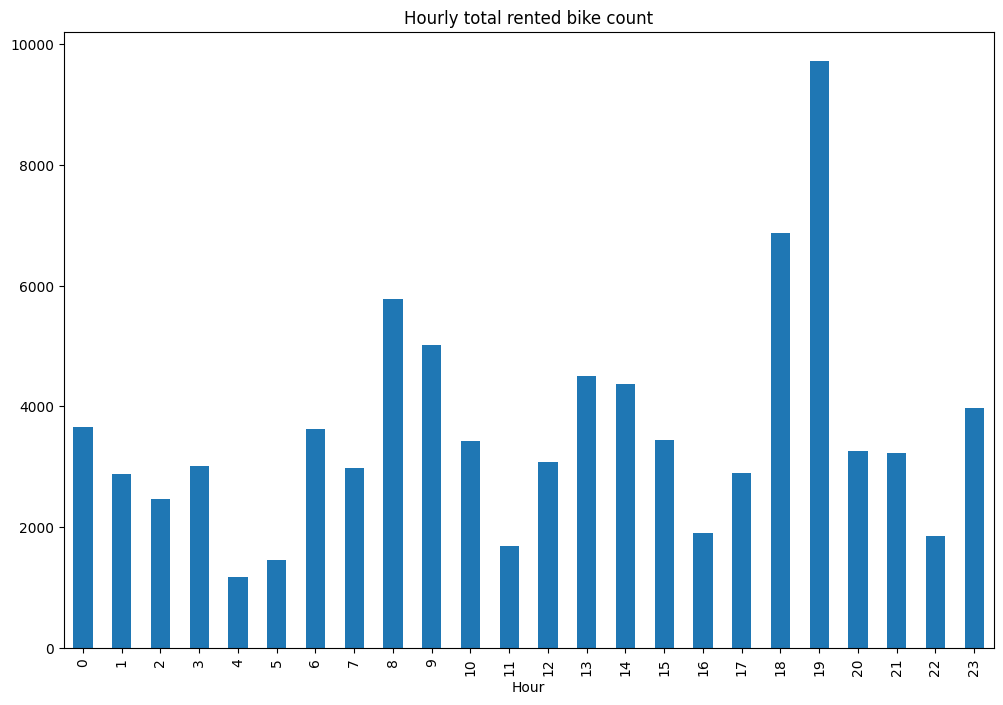

In [ ]:
# hourly total rented bike count count in df_2 are plotted

plt = df_2.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar', title='Hourly total rented bike count', figsize=(12, 8))

In [ ]:
# four quartiles of the Rainfall(mm) column in df_2

quartiles = df_2['Rainfall(mm)'].quantile([0.25, 0.5, 0.75, 1])
print(quartiles)

# The data is partitioned into four groups based on the quartiles of the Rainfall(mm) column

grp_1 = df_2[df_2['Rainfall(mm)'] <= quartiles[0.25]]
grp_2 = df_2[(df_2['Rainfall(mm)'] > quartiles[0.25]) & (df_2['Rainfall(mm)'] <= quartiles[0.5])]
grp_3 = df_2[(df_2['Rainfall(mm)'] > quartiles[0.5]) & (df_2['Rainfall(mm)'] <= quartiles[0.75])]
grp_4 = df_2[df_2['Rainfall(mm)'] > quartiles[0.75]]

0.25     0.5
0.50     1.0
0.75     2.5
1.00    35.0
Name: Rainfall(mm), dtype: float64


## Inbuilt ANOVA test

In [ ]:
# ANOVA test

f_statistic, p_value = stats.f_oneway(grp_1['Rented Bike Count'], grp_2['Rented Bike Count'], grp_3['Rented Bike Count'], grp_4['Rented Bike Count'])

print(f_statistic, p_value)

print(f"Null hypothesis {'rejected' if p_value < alpha else 'failed to be rejected'} at α = {alpha}")

12.725206168514127 4.9378625332842514e-08
Null hypothesis rejected at α = 0.05


## Manual ANOVA Test

In [ ]:
# The means for the four groups are calculated

mean_grp_1 = grp_1['Rented Bike Count'].mean()
mean_grp_2 = grp_2['Rented Bike Count'].mean()
mean_grp_3 = grp_3['Rented Bike Count'].mean()
mean_grp_4 = grp_4['Rented Bike Count'].mean()

mean = df_2['Rented Bike Count'].mean()

n_1 = grp_1.shape[0]
n_2 = grp_2.shape[0]
n_3 = grp_3.shape[0]
n_4 = grp_4.shape[0]

# SSW (Sum of Squares Within) is calculated

ssw = ((grp_1['Rented Bike Count'] - mean_grp_1)**2).sum() + ((grp_2['Rented Bike Count'] - mean_grp_2)**2).sum() + ((grp_3['Rented Bike Count'] - mean_grp_3)**2).sum() + ((grp_4['Rented Bike Count'] - mean_grp_4)**2).sum()

# DOFs (Degrees of Freedom) for the SSW

dof_ssw = n_1 + n_2 + n_3 + n_4 - 4

# Mean Squares Within is calculated

msw = ssw / dof_ssw

# SSB (Sum of Squares Between) is calculated

ssb = n_1 * (mean_grp_1 - mean)**2 + n_2 * (mean_grp_2 - mean)**2 + n_3 * (mean_grp_3 - mean)**2 + n_4 * (mean_grp_4 - mean)**2

# DOFs (Degrees of Freedom) for the SSB

dof_ssb = 4 - 1

# Mean Squares Between is calculated

msb = ssb / dof_ssb

# F-statistic is calculated

f_statistic = msb / msw

# p-value is calculated

p_value = 1 - stats.f.cdf(f_statistic, dof_ssb, dof_ssw)

print(f_statistic, p_value)

print(f"Null hypothesis {'rejected' if p_value < alpha else 'failed to be rejected'} at α = {alpha}")

12.725206168514129 4.937862529974524e-08
Null hypothesis rejected at α = 0.05


# Question 3
Visualize the average hourly bike rentals in Summer Season and Spring Season. Identify if the two distributions are different using Chi-squared test.

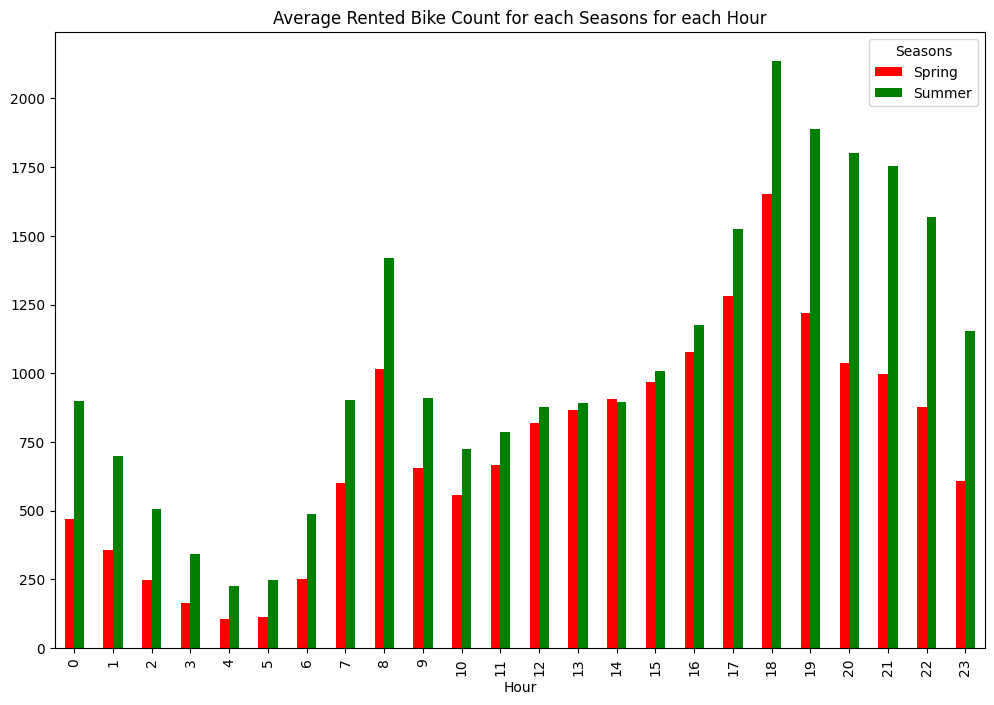

In [ ]:
# Data for which 'Seasons' take the values 'Summer' or 'Spring'

df_3 = df[(df['Seasons'] == 'Summer') | (df['Seasons'] == 'Spring')]

# Average 'Rented Bike Count' for each 'Seasons' for each 'Hour' in df_3

plt = df_3.groupby(['Hour', 'Seasons'])['Rented Bike Count'].mean().unstack().plot(kind='bar', title='Average Rented Bike Count for each Seasons for each Hour', color=['red', 'green'], figsize=(12, 8))

## Manual Chi-squared test

In [ ]:
import numpy as np
from scipy.stats import chi2, chi2_contingency

# Constructing the contingency table using pivot with a different approach
contingency_data = df_3.groupby(['Hour', 'Seasons'])['Rented Bike Count'].mean().unstack().fillna(0)

# Observed values directly from the contingency table
observed_values = contingency_data.values

# Row and column totals calculated individually
total_by_hour = contingency_data.sum(axis=1)
total_by_season = contingency_data.sum(axis=0)

# Overall total for all observed values
total_observations = np.sum(observed_values)

# Calculating expected values manually by iterating over the matrix dimensions
expected_values = np.zeros_like(observed_values)
for i in range(observed_values.shape[0]):
    for j in range(observed_values.shape[1]):
        expected_values[i, j] = (total_by_hour.iloc[i] * total_by_season.iloc[j]) / total_observations

# Chi-squared statistic calculation using an element-wise operation
chi2_value = np.sum((observed_values - expected_values) ** 2 / expected_values)

# Degrees of freedom calculation
df = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

# P-value calculation using the chi-squared distribution
p_val = chi2.sf(chi2_value, df)

# Output the chi-squared statistic, degrees of freedom, and p-value
print(f"Chi-squared Statistic: {chi2_value:.3f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_val:.5f}")

# Comparing p-value with alpha to conclude significance
if p_val < alpha:
    print("There is a statistically significant difference between the hourly distributions of 'Rented Bike Count' across the seasons.")
else:
    print("No statistically significant difference found between the hourly distributions of 'Rented Bike Count' across the seasons.")

Chi-squared Statistic: 529.860
Degrees of Freedom: 23
P-value: 0.00000
There is a statistically significant difference between the hourly distributions of 'Rented Bike Count' across the seasons.


## Inbuilt chi-squared test

In [ ]:
# Perform the chi-squared test
chi2_stat, p_val, df, expected = chi2_contingency(contingency_data, correction=False)

# Output the chi-squared statistic, degrees of freedom, and p-value
print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_val:.5f}")

# Comparing p-value with alpha to conclude significance
if p_val < alpha:
    print("There is a statistically significant difference between the hourly distributions of 'Rented Bike Count' across the seasons.")
else:
    print("No statistically significant difference found between the hourly distributions of 'Rented Bike Count' across the seasons.")

Chi-squared Statistic: 529.860
Degrees of Freedom: 23
P-value: 0.00000
There is a statistically significant difference between the hourly distributions of 'Rented Bike Count' across the seasons.
